In [105]:
# matplotlib jupyter notebook formatting
%matplotlib inline
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
# create file path variables
ride_data_to_load = 'Resources/ride_data.csv'
city_data_to_load = 'Resources/city_data.csv'

In [107]:
# Read the cities csv and store it in a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [108]:
# Read the ride data into a dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [109]:
# explore city data df
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [110]:
# get the rows that have null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [111]:
# count the number of data points for each type of city
city_data_df.groupby(['type']).count()['city']

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

In [112]:
# null values for ride data df
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [113]:
# check ride_data_df dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [114]:
# merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city'], how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [115]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

In [116]:
# number of city rides for each city in each city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [117]:
# obtain the average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [118]:
# average drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

In [119]:
# increase marker size by a factor of ten
bigger_urban_markers = [value * 10 for value in urban_driver_count]
bigger_suburban_markers = [value1 * 10 for value1 in suburban_driver_count]
bigger_rural_markers = [value2 * 10 for value2 in rural_driver_count]

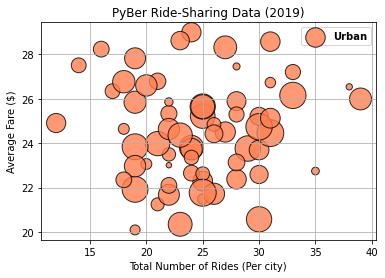

In [120]:
# create urban cities scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, s=bigger_urban_markers, c='coral', alpha=.8, edgecolor='k', linewidths=1, label='Urban')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)


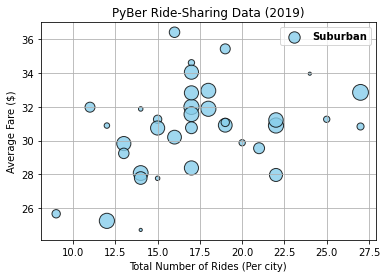

In [121]:
# Create Suburban Cities Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=bigger_suburban_markers, c='skyblue', alpha=.8, linewidths=1, edgecolor='k', label='Suburban')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)

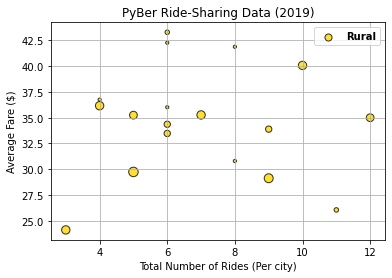

In [122]:
# Create Rural Cities Bubble Chart
plt.scatter(rural_ride_count, rural_avg_fare, s=bigger_rural_markers, c='gold', alpha=.8, linewidths=1, edgecolor='k', label='Rural')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)

Text(28, 35, 'Note: Circle size correlates \n with driver count per city')

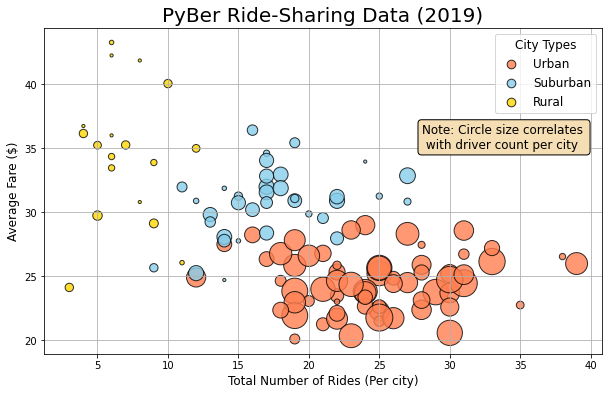

In [137]:
# merging the scatter plots
plt.figure(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=bigger_urban_markers, c='coral', alpha=.8, edgecolor='k', linewidths=1, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s=bigger_suburban_markers, c='skyblue', alpha=.8, linewidths=1, edgecolor='k', label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s=bigger_rural_markers, c='gold', alpha=.8, linewidths=1, edgecolor='k', label='Rural')
plt.xlabel('Total Number of Rides (Per city)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.legend(prop=dict(weight='bold'))
plt.grid(True)
# Format combined scatter plot legend
lgnd = plt.legend(fontsize=12, mode='Expanded', scatterpoints=1, loc='best', title='City Types',)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# add text box to discuss circle size
box_format = dict(boxstyle='round', pad=0.3, fc='wheat', ec='k', lw=1)
plt.text(28, 35, 'Note: Circle size correlates \n with driver count per city', fontsize=12, bbox=box_format,)

In [ ]:
# save the figure
plt.savefig()